# Covers de una decada icónica del siglo pasado (Amazon Music)

### En el siguiente conjunto de datos a analizar tenemos 980 canciones de una década del siglo pasado.

Primero, importamos **pandas** como librería predilecta para leer y analizar nuestros datos.

In [1]:
import pandas as pd 

Imprimimos por pantalla los primeros 5 registros y los últimos 5 para tener un primer pantallazo con lo que estamos tratando.

In [2]:
raw_covers = pd.read_csv("Covers.csv")
raw_covers

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,2:42,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,4:03,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,2:54,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,4:02,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,6:15,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,2:15,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,2:54,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,2:58,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


## Tipo de Datos

Con el objetivo de adentrarnos en el análisis exhaustivo de los datos, necesitamos entender cuáles son las características estructurales de nuestro dataset.

In [3]:
raw_covers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

Observamos entonces, que tenemos 980 registros con 17 variables a analizar.

Del método **info** de **pandas**, sabemos que por lo menos a primera vista, no tenemos valores nulos en nuestro conjunto, y que tenemos un 11,76% de los datos que son **Cualitativos**, **Categóricos** y **Nominales** porque no tienen un orden natural definido: Track y Artist. Vemos que la variable Duration está catalogada como lo que podría ser un dato cualitativo, pero la analizaremos máß adelante. Por ahora, la tomaremos como lo que en realidad es: un dato cuantitativo.

Luego, tenemos que el 29,41% son datos **cuantitativos** y **discretos** como son Time Signature, Key, Mode, Popularity y Year. Y por último tenemos un 52,94% de datos **cuantitativos** y **continuos** como son Danceability, Energy, Loudness, Speechiness, Acousticness, Instrunmentalness, Liveness, Valence, y Tempo.

## Descripción de las variables

**Track**: el título de la canción.

**Artist**: el intérprete o grupo que grabó la canción.

**Duration**: la duración de la canción, medida en minutos y segundos.

**Time_Signature**: la métrica musical de la canción, indica el número de pulsaciones por compás.

**Danceability**: una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.

**Energy**: una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.

**Key**: la tonalidad musical en la que está compuesta la canción, representada por un número entero.

**Loudness**: el volumen promedio de la canción, medido en decibelios (dB).

**Mode**: la modalidad de la pista, indica si la canción está en tono mayor o menor.

**Speechiness**: una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.

**Acousticness**: una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.

**Instrumentalness**: una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.

**Liveness**: una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.

**Valence**: Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.

**Tempo**: la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).

**Popularity**: una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.

**Year**: el año en que se lanzó la canción.

## Planteamiento de hipótesis

* La medida que indica el número de pulsaciones por compás deberia estar directamente relacionada con el ritmo de la pista medida en pulsaciones por minuto que a su vez quizás esta relacionada con la intensidad de la canción. A mayor pulsaciones por compás, mayor deben ser las pulsaciones por minuto,  y mayor actividad: **Time_signature - Tempo - Energy**.

* Si una canciön es muy adecuada para bailarla, tenderá a ser mas alegre: **Danceability - Valence**.

* Una canción con un volumen muy elevado, suponemos que deberia ser mas enérgica: **Loudness - Energy**.

* Si una pista tiene muchas probabilidades de haber sido interpretada en vivo, entonces seguramente tenga un volumen elevado: **Liveness - Loudness**.

* A su vez, si una canción tiene una popularidad alta, es muy probable que se haya interpretado en vivo o viceversa: **Popularity - Liveness**.

* Las canciones mas adecuadas para bailar deben ser mas populares que otras: **Danceability - Popularity**.

* Una pista muy instrumental deberia tener valores directamente opuestos de cantidad de palabras habladas y viceversa: **Instrumentalness - Speechiness**. 

## Primera descripción estadística de las variables

In [4]:
raw_covers.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,3.940816,0.587693,0.580877,5.191837,-9.863873,0.760204,0.059923,0.332959,0.048240,0.176269,0.621149,118.872768,53.289796,1974.563265
std,0.279660,0.157856,0.202379,3.577814,3.718417,0.427177,0.065535,0.280076,0.165712,0.155862,0.251799,27.023443,18.262967,2.850564
min,1.000000,0.094200,0.005320,0.000000,-31.646000,0.000000,0.023200,0.000022,0.000000,0.015000,0.000010,53.986000,0.000000,1970.000000
25%,4.000000,0.486000,0.428000,2.000000,-12.358500,1.000000,0.031300,0.076550,0.000000,0.086300,0.421750,99.919750,43.000000,1972.000000
50%,4.000000,0.600000,0.583000,5.000000,-9.558500,1.000000,0.038300,0.270500,0.000050,0.119000,0.650500,117.436500,56.000000,1975.000000
75%,4.000000,0.698000,0.731250,8.250000,-7.095500,1.000000,0.056725,0.544250,0.002822,0.198250,0.845000,134.007750,66.000000,1977.000000
max,5.000000,0.985000,0.995000,11.000000,-2.340000,1.000000,0.737000,0.996000,0.970000,0.985000,0.989000,211.270000,90.000000,1979.000000


Las variables Track y Artist, al ser datos cualitativos, la libreria **Pandas** las elimina del análisis descriptivo porque se encarga de tomar datos estadíticos, lo que es imposible con variables cualitativas nominales.

**Time_Signature**: Sus valores se encuentran en un rango de 1 a 5, con un desvío estandar cercano a cero, por lo que podríamos estr observando una distribución normal porque los datos se encuuentran cerca de la media.

**Danceability**: Sus valores se encuentran en un rango de 0 a 1, con un desvio estandar cercano a cero.

**Energy**: Sus valores se encuentran en un rango de 0 a 1, con un desvio estandar cercano a cero, pero con el 75% de los datos por encima del promedio por lo que tenemos una mayor cantidad de pistas enérgicas. Vemos tambien, que el valor mínimo de esta variable es de una magnitud 109 veces menor que el promedio, indicando que tenemos por lo menos un outlier.

**Key**: Sus valores se encuentrane un rango de 0 a 12, con un desvío estandar medianamente elevado, significando que tenemos variedad de tonos musicales en nuestro conjunto.

**Loudness**: Como es una medida en decibelios, su rango es de -100 a 0. En este caso, vemos que el 75% de los datos se encuentran mas cercanos al limite superior, por lo que tenemos una mayoría de canciones con un nivel de ruido elevado.

**Mode**: Al ser una variable discreta, no tiene sentido analizar promedios, desvios o cuartiles. Sus poosibles valores son 0 o 1 indicando si la cancion esta en tono mayor o menor.

**Speechiness**:  El rango se mueve entre 0 y 1. Notamos que la media de 0.059 indica que la presencia de palabras habladas en una pista generalmente es baja. El primer y tercer cuartil refuerzan esta idea con datos similares: 0.031 y 0.038. Con un desvío estándar muy cercano a 0, indica que la mayoría de los valores estarán cerca de la media en lo que podría ser una distribución normal. Notamos también la presencia de algún outlier al tener un valor máximo de 12 veces mas grande que la media.

**Acousticness**: El rango se mueve entre 0 y 1. La media de 0.33 indica que, en promedio, hay una presencia acústica moderada en las pistas analizadas. Lo que indica que hay una concentración significativa de pistas con niveles bajos de acusticidad. Y teniendo el mínimo con un valor 15 MIL veces menor que la media, nos indica la presencia de un outlier por el lado de una pista muy poco acústica.

**Instrumentalness**: El rango se mueve entre 0 y 1. Vemos que la mayor cantidad de valores se concentran en valores muy bajos y en su mayoría son ceros o cercanos al mismo. La disparidad entre el valor máximo y el 75% de la muestra nos indica la presencia de outlier.

**Liveness**: El rango se mueve entre 0 y 1. Tendremos la mayoría de los valores cercanos a 0, lo que nos indica poco ruido de audiencia, es decir, menor probabilidad de que se haya interpretado en vivo. Seguramente observemos una distribución normal en esta variable.

**Valence**: Su rango se ubica entre 0 y 1. Podemos ver por el valor de la media y la relativa paridad entre cuartiles, que parece ser una distribución normal. Aunque tenemos un claro outlier por el lado de una pista musical completamente triste con un valor mínimo 62 MIL veces menor que la media.

**Tempo**: Su rango se encuentra entre 50 y 215 pulsaciones por minuto. Una desviación estandar elevada nos indica que nuestras pistas varían bastante en esta característica.

**Popularity**: Su rango se ubica entre 0 y 100 puntos de poularidad.

**Year**: Su rango se encuentra entre el año 1970 y el año 1979.

## Limpieza de nuestro conjunto

Queremos trabajar con datos limpios y claros para analizar nuestro conjunto, por lo que debemos buscar registros repetidos para no incluirlos dentro de nuestro trabajo.

Tomamos como clave de los registros la dupla Artista-Canción para encontrarlos y agrupamos nuestro dataset con estas 2 variables para ejecutar nuestra búsqueda.

In [5]:
cancion_repetida = raw_covers.groupby(['Artist','Track']).value_counts()
print(cancion_repetida)

Artist                    Track                                            Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  Tempo    Popularity  Year
100 Proof (Aged in Soul)  Somebody’s Been Sleeping                         2:42      4               0.799         0.528   11   -15.649   0     0.0731       0.01220       0.739000          0.0479    0.826    148.030  13          1970    1
10cc                      I’m Not In Love                                  3:49      4               0.472         0.968   7    -5.322    0     0.1820       0.00476       0.001900          0.3610    0.158    135.953  37          1975    1
                          The Things We Do For Love                        3:27      4               0.637         0.528   1    -9.837    1     0.0394       0.16300       0.000000          0.1220    0.781    106.949  64          1977    1
8th Day                   She’s Not Just Another 

A primera vista, observamos que al agrupar nuestro conjunto e imprimirlo, obtenemos 980 filas, que es la misma cantidad inicial. Entonces podemos concluir que **no tenemos registros repetidos** en nuestros datos.

Para seguir puliendo, vamos a buscar valores nulos para saber cómo tratarlos próximamente: eliminarlos, transformarlos, o analizar la razón de la nulidad de los mismos.

In [6]:
raw_covers.isnull().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

Ejecutamos una sumatoria de valores con el método **isnull** de **Pandas** que marca la presencial de valores "NULL" y en todas las variables obtuvimos una suma de 0, por lo que no tenemos valores null en nuestro conjunto.

In [7]:
raw_covers.isna().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

Ejecutamos una sumatoria de valores con el método **isna** de **Pandas** que marca la presencial de valores "NaN" (Not a Number) y en todas las variables obtuvimos una suma de 0, por lo que no tenemos valores NaN en nuestro conjunto.

Pero para terminar de asegurarnos del todo, como anteriormente cuando describimos estadísticamente las variables no habia ninguna de las cuantitativas que presentara valores extraños que pueda considerarse nulos, vamos a agrupar los valores solamente de las cualitativas y encontrar posibles nulos o errores de carga.

In [8]:
raw_covers['Artist'].value_counts(ascending=False)

Artist
Elton John                                     15
Bee Gees                                       14
The Carpenters                                 12
Chicago                                        10
Stevie Wonder                                  10
                                               ..
Clint Holmes                                    1
Jermaine Jackson                                1
the DeFranco Family featuring Tony DeFranco     1
Marie Osmond                                    1
GQ                                              1
Name: count, Length: 530, dtype: int64

In [9]:
raw_covers['Track'].value_counts(ascending=False)

Track
On And On                           2
Never Can Say Goodbye               2
Don’t It Make My Brown Eyes Blue    2
How Deep Is Your Love               2
Dance With Me                       2
                                   ..
The Cover Of The Rolling Stone      1
Right Place Wrong Time              1
Frankenstein                        1
Here I Am (COME And Take Me)        1
Dim All The Nights                  1
Name: count, Length: 965, dtype: int64

Sabemos que no tenemos valores **NULL** o **NaN** pero como la libreria Pandas no nos muestra todos los datos, los imprimimos para comprobar que no tenemos uno o mas datos cualitativos con valor "Unknow" o cualquier nombre extraño.

In [10]:
for artista, cancion in raw_covers['Artist'].value_counts().items():
    print(artista, cancion)

Elton John 15
Bee Gees 14
The Carpenters 12
Chicago 10
Stevie Wonder 10
Three Dog Night 9
Barry Manilow 9
Eagles 9
Electric Light Orchestra 8
Earth, Wind & Fire 8
Helen Reddy 7
Gladys Knight & the Pips 7
Donna Summer 7
Olivia Newton-John 7
John Denver 7
Al Green 7
Commodores 7
Captain & Tennille 7
War 6
Linda Ronstadt 6
The Jackson 5 6
Fleetwood Mac 6
The O’Jays 6
Paul McCartney & Wings 6
Anne Murray 5
America 5
Paul Simon 5
Steve Miller Band 5
Marvin Gaye 5
Alice Cooper 5
KC and the Sunshine Band 5
Carly Simon 5
Neil Diamond 5
Tony Orlando and Dawn 5
Andy Gibb 5
Cher 5
Ringo Starr 5
Barbra Streisand 5
Barry White 5
Jim Croce 4
Donny Osmond 4
Diana Ross 4
Cat Stevens 4
Rod Stewart 4
Michael Jackson 4
Billy Preston 4
Aretha Franklin 4
Steely Dan 4
The Rolling Stones 4
The Temptations 4
Kenny Rogers 4
Bob Seger & The Silver Bullet Band 4
Bread 4
Bay City Rollers 4
James Taylor 4
Foreigner 4
Sweet 4
Chic 4
Queen 4
Shaun Cassidy 3
Little River Band 3
Gordon Lightfoot 3
Lobo 3
Bill Withers 

Comprobamos los datos de los Artistas llamados "10cc", "GQ", "M" solo por tener nombres extraños y asegurarnos de que no sean muestras basura.

In [11]:
lista = ['10cc', 'GQ', 'M']
covers_filtrado = raw_covers[raw_covers['Artist'].isin(lista)]
covers_filtrado

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
560,I’m Not In Love,10cc,3:49,4,0.472,0.968,7,-5.322,0,0.1820,0.00476,0.00190,0.3610,0.158,135.953,37,1975
718,The Things We Do For Love,10cc,3:27,4,0.637,0.528,1,-9.837,1,0.0394,0.16300,0.00000,0.1220,0.781,106.949,64,1977
944,Pop Muzik,M,3:48,4,0.912,0.673,2,-8.910,1,0.1090,0.09950,0.00000,0.1030,0.123,120.157,56,1979
968,Disco Nights (ROCK-FREAK),GQ,5:54,4,0.798,0.528,5,-12.228,0,0.0531,0.01160,0.00379,0.0446,0.898,122.610,39,1979


Todos son datos válidos asique no tenemos que eliminar ni transformar nada.

## Conversión de tipos

Al principio, habiamos dicho que la variable **Duration** la ibamos a tratar como un dato **cuantitativo** porque es la medición de la duración de una canción. Asi que, para poder incluirla en el análisis y tratar con ella, vamos a convertirla a un dato numérico, aplicandole un reemplazo de ":" (razón por la que Pandas la tomaba como un String) por un ".", y castearla a un tipo **float**.

In [12]:
covers_duracion_transformada = raw_covers.copy()
covers_duracion_transformada['Duration'] = raw_covers['Duration'].str.replace(':','.').astype(float)
covers_duracion_transformada['Duration']

0      2.42
1      4.03
2      2.56
3      2.54
4      4.02
       ... 
975    6.15
976    2.15
977    2.54
978    2.58
979    4.08
Name: Duration, Length: 980, dtype: float64

Y si queremos complementar el análisis descriptivo anterior le aplicamos el método **describe()**.

In [13]:
covers_duracion_transformada['Duration'].describe()

count    980.000000
mean       3.609041
std        1.387657
min        1.160000
25%        3.040000
50%        3.350000
75%        4.120000
max       26.010000
Name: Duration, dtype: float64

Es una variable que en esta muestra tendrá un rango de 0 a 30 minutos por canción. Con un promedio de 3.6 minutos y un máximo de 26 minutos.

Por otro lado, notamos que la variable **Loudness** que mide el volumen promedio de una canción, tiene valores negativos y mas adelante en el análisis de correlación vamos a ver que todas las demás variables incluidas tienen un rango de valores entre 0 y 1. Como siempre es conveniente trabajar con rangos iguales en ambos lados, vamos a convertir el rango de **Loudness** que actualmente tiene un rango teórico de **-100 a 0**, a un intervalo entre **0 y 1**.

Para hacerlo, vamos a aplicarle a la columna **Loudness** una función de valor absoluto donde convertimos todo su rango negativo en un rango positivo, y a partir de eso, encasillar sus valores entre 0 y 1 dividiendolos por 100.

In [14]:
covers_duracion_y_loudness_transformada = covers_duracion_transformada.copy()
covers_duracion_y_loudness_transformada['Loudness'] = covers_duracion_transformada['Loudness'].abs() / 100
covers_duracion_y_loudness_transformada['Loudness'].describe()

count    980.000000
mean       0.098639
std        0.037184
min        0.023400
25%        0.070955
50%        0.095585
75%        0.123585
max        0.316460
Name: Loudness, dtype: float64

Notamos que ya la variable Loudness se encuentra en el rango que queremos y vamos a ver más adelante como trabajamos mas comodamente.

## Matriz de correlación

Llegamos al punto donde ya tenemos todos los datos básicos y necesarios de cada variable particular, por lo que ahora queremos estudiar el comportamiento bivariado de todas las vaiables cuantitativas de nuestro conjunto. Para eso, vamos a utilizar la **matriz de correlación**, pero antes debemos quitar de nuestro DataFrame los **datos cualitativos** porque no existe una relación numérica entre dos palabras.

In [15]:
covers_sin_track_artist = covers_duracion_y_loudness_transformada.drop(['Track','Artist'], axis=1)
matriz_correlacion = covers_sin_track_artist.corr()
matriz_correlacion

,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
Duration,1.000000,-0.004463,-0.047164,-0.003672,0.045059,0.064686,-0.080998,0.010918,-0.106135,0.066365,0.012645,-0.089477,-0.051571,0.038248,0.101437
Time_Signature,-0.004463,1.000000,0.187562,0.204889,-0.015184,-0.067192,-0.007765,0.062508,-0.162942,-0.010567,-0.027574,0.196694,-0.028967,0.037160,-0.017081
Danceability,-0.047164,0.187562,1.000000,0.214106,0.007224,-0.117018,-0.074487,0.122851,-0.289435,-0.072341,-0.203165,0.543124,-0.126015,0.110817,0.120210
Energy,-0.003672,0.204889,0.214106,1.000000,-0.045086,-0.670980,-0.076433,0.183647,-0.602552,-0.072815,0.124811,0.407548,0.136926,0.065086,0.004188
Key,0.045059,-0.015184,0.007224,-0.045086,1.000000,0.059878,-0.164355,0.002664,0.032761,-0.017979,0.054373,-0.015310,-0.006183,-0.042028,-0.038449
Loudness,0.064686,-0.067192,-0.117018,-0.670980,0.059878,1.000000,0.011323,-0.132885,0.406708,0.232382,-0.062452,-0.107765,-0.082913,-0.129457,-0.025810
Mode,-0.080998,-0.007765,-0.074487,-0.076433,-0.164355,0.011323,1.000000,-0.077697,0.104428,-0.086634,0.047852,0.000277,-0.010323,-0.043979,-0.051700
Speechiness,0.010918,0.062508,0.122851,0.183647,0.002664,-0.132885,-0.077697,1.000000,-0.118307,-0.027544,0.099635,0.000405,0.075824,0.004400,-0.049025
Acousticness,-0.106135,-0.162942,-0.289435,-0.602552,0.032761,0.406708,0.104428,-0.118307,1.000000,0.079800,0.006178,-0.282954,-0.086766,-0.108711,-0.105284
Instrumentalness,0.066365,-0.010567,-0.072341,-0.072815,-0.017979,0.232382,-0.086634,-0.027544,0.079800,1.000000,-0.005047,-0.093971,-0.051441,-0.101959,-0.020297


Ahora representamos gráficamente esta matriz con la característica de **mapa de calor** donde tonalidades del color **rojo** representan valores cercanos a 1 y tonalidades del color **azul** representan valores cercanos a -1.

Matplotlib is building the font cache; this may take a moment.


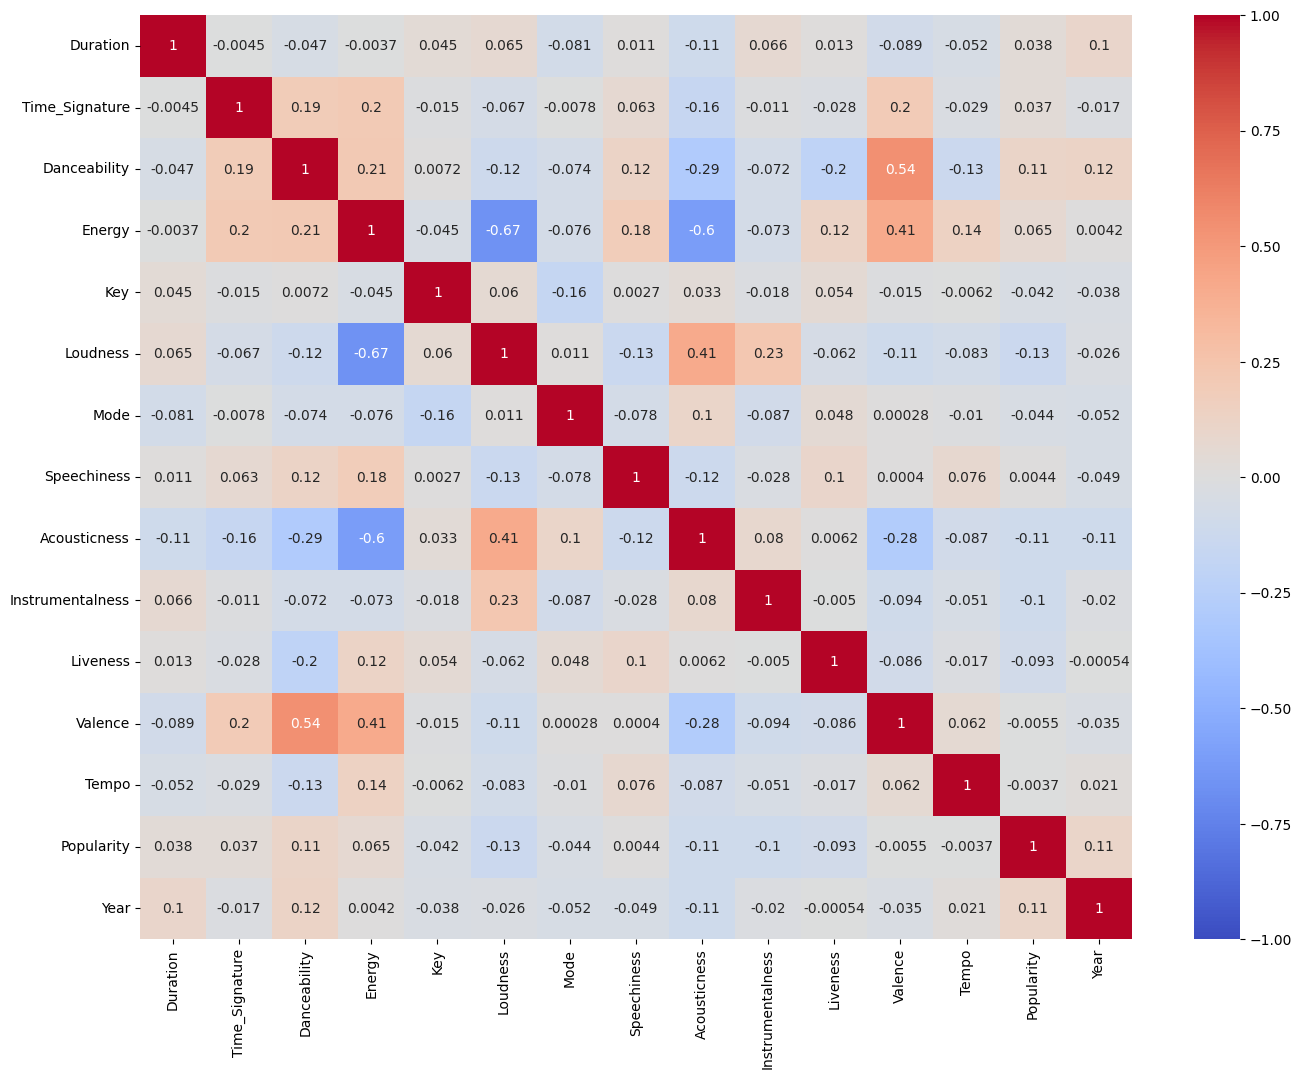

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(matriz_correlacion, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Vamos a pasar en limpio esta matriz quitándole la información difusa como la correlación entre mismas variables. Y establecer una condición para mostrar sólo aquellos coeficientes que su valor sea digno de estudio. En este caso, basándonos en el estándar aceptado actualmente, no tenemos ni un solo coeficiente que llegue al valor absoluto de 0.7, por lo que vamos a establecer un líimite en 0.4 y estudiar el comportamiento entre aquellas variables que lo cumplan.

Igualmente, en el caso contrario, se estudiará más adelante el motivo de la poca o casi nula relación que hay entre la mayoría de las variables.

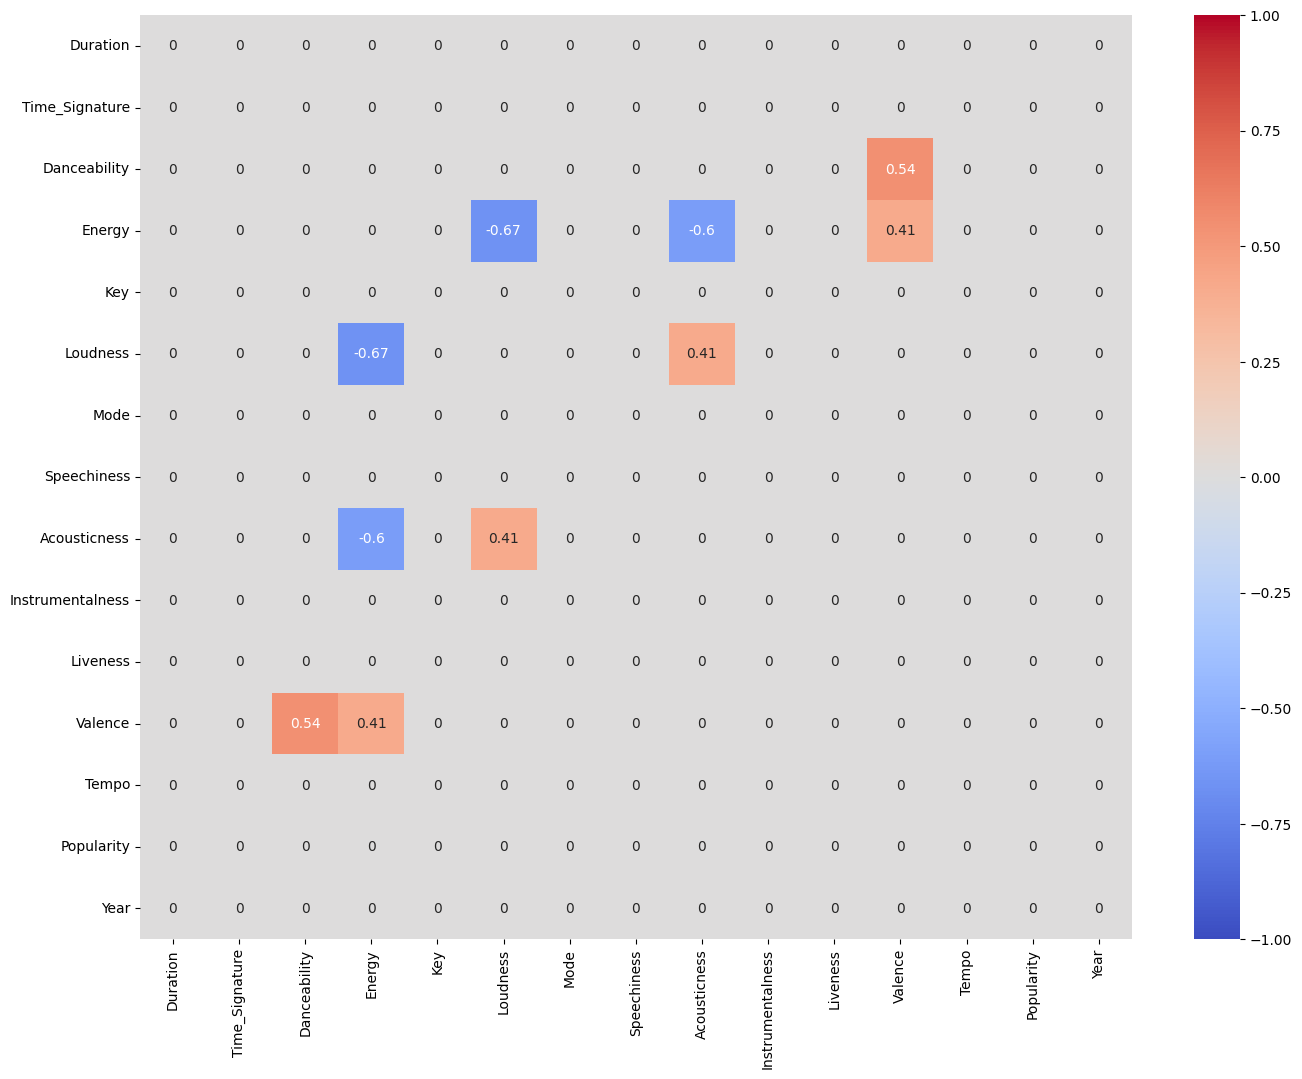

In [17]:
import numpy as np

matriz_correlacion_ajustada = matriz_correlacion.where(matriz_correlacion.abs() > 0.4, 0)
np.fill_diagonal(matriz_correlacion_ajustada.values, 0)

plt.figure(figsize=(16,12))
sns.heatmap(matriz_correlacion_ajustada, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Las variables de nuestro conjunto a las que estudiaremos su correlación son:

**Danceability** - **Valence**

**Energy** - **Loudness**

**Energy** - **Acousticness**

**Energy** - **Valence**

**Loudness** - **Acousticness**

## Estudio de correlación

Podemos observar a primera vista gracias a la [descripción estadística de las variables](#primera-descripción-estadística-de-las-variables) que vamos a tener que aplicar alguna especie de transformación de escalado con la variable **Loudness** porque es la única dentro de nuestras tuplas de correlación mayor a 0.4 que no se mueve en un rango de entre 0 y 1.

Antes de hacer el análisis bivariado, vamos a observar en profundidad individualmente cada variable para entenderlas bien antes de compararlas con otra.

### Danceability

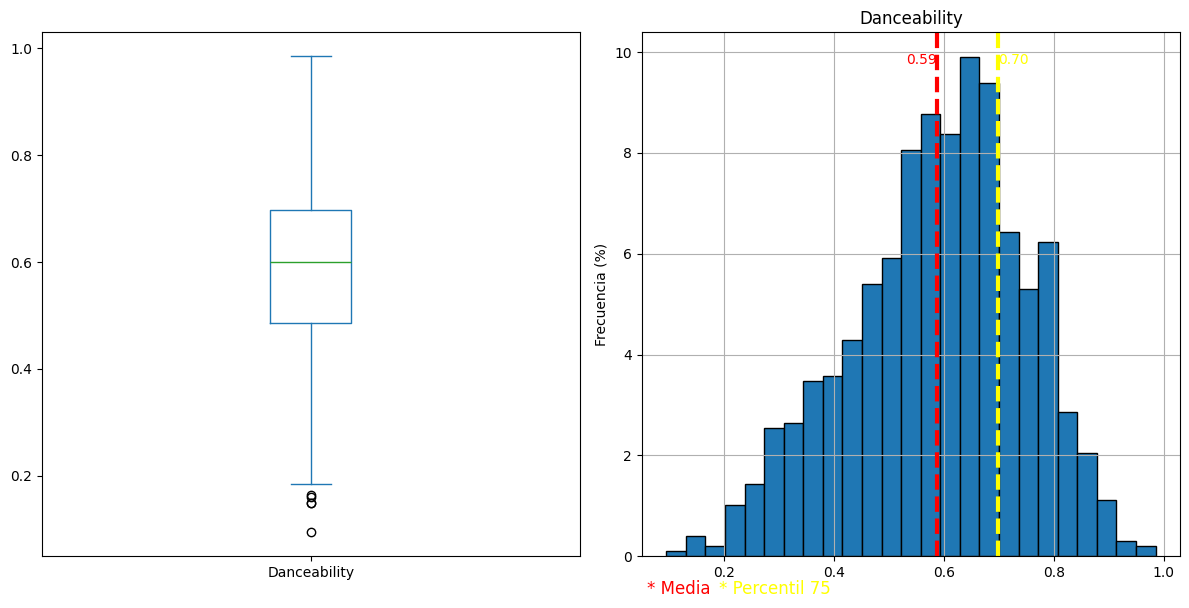

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Danceability'].plot.box(ax=axes[0])

dance_hist = covers_sin_track_artist['Danceability'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Danceability"]) + 1. / covers_sin_track_artist["Danceability"].size * 100, edgecolor='black', ax=axes[1])
dance_hist.set_title("Danceability")
dance_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Danceability'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Danceability'], 75)
dance_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
dance_hist.text(media, dance_hist.get_ylim()[1] * 0.95, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
dance_hist.text(cuartil3, dance_hist.get_ylim()[1] * 0.95, f'{cuartil3:.2f}', color='yellow', ha='left', va='center_baseline', rotation=0)
dance_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

plt.figtext(0.57, 0.01, "* Media", ha='center', va='center', fontsize=12, color='red')
plt.figtext(0.65, 0.01, "* Percentil 75", ha='center', va='center', fontsize=12, color='yellow')

plt.tight_layout()
plt.show()

In [19]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Danceability'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Danceability'].kurtosis():.2f}")

Coeficiente de asimetría: -0.34
Kurtosis: -0.29


Lo que vemos tanto en el boxplot como en el histograma de la variable **Danceability** es que como habíamos supuesto en la [descripción estadística de las variables](#primera-descripción-estadística-de-las-variables), se trata de una distribución normal con un ligero sesgo a la izquierda, coeficiente de asimetría negativo indicando que los valores extremos están a la izquierda de la media.

### Valence

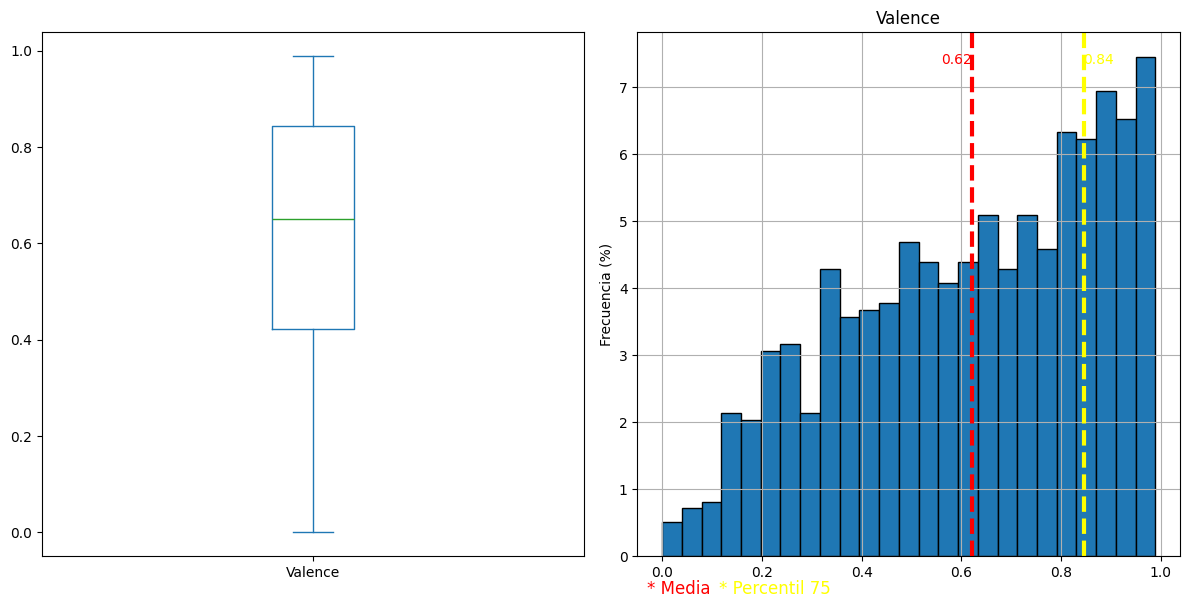

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Valence'].plot.box(ax=axes[0])

valence_hist = covers_sin_track_artist['Valence'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Valence"]) + 1. / covers_sin_track_artist["Valence"].size * 100, edgecolor='black', ax=axes[1])
valence_hist.set_title("Valence")
valence_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Valence'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Valence'], 75)
valence_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
valence_hist.text(media, valence_hist.get_ylim()[1] * 0.95, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
valence_hist.text(cuartil3, valence_hist.get_ylim()[1] * 0.95, f'{cuartil3:.2f}', color='yellow', ha='left', va='center_baseline', rotation=0)
valence_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

plt.figtext(0.57, 0.01, "* Media", ha='center', va='center', fontsize=12, color='red')
plt.figtext(0.65, 0.01, "* Percentil 75", ha='center', va='center', fontsize=12, color='yellow')

plt.tight_layout()
plt.show()

In [21]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Valence'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Valence'].kurtosis():.2f}")

Coeficiente de asimetría: -0.39
Kurtosis: -0.95


Observamos principalmente en el boxplot que la variable **Valence** tiene una distribución normal con un coeficiente de asimetría negativo indicando que sus valores extremos están ubicados a la izquierda de la media. Difícil de notar en el histograma por la alta frecuencia de sus valores en la muestra. Y como habíamos notado anteriormente, el valor mínimo de esta variable tiene una diferencia tan gigantezca con su media que no logra notarse en ambas gráficas.

Notamos que la mayor frecuencia de las muestras se encuentran en su máximo y alrededores cercanos, lo que siempre a primera vista puede parecer extraño. Asique vamos a analizar todos sus valores máximos a ojo para notar si hay cargas incorrectas o tenemos alguna especie de datos basura que nos esten desplazando las distribuciones y dando una mala lectura de los análisis posteriores.

In [22]:
# Creamos una copia para no alterar ni el orden de los datos en el dataset original
copia_para_valence = raw_covers.copy()

# Ordenamos los valores de forma ascendente
df_valence = copia_para_valence.sort_values(by='Valence', ascending=False)

In [23]:
# Desactivamos la opcion de Pandas que nos limita la cantidad de filas a mostrar para nuestro chequeo
pd.set_option('display.max_rows', None)

In [24]:
df_valence['Valence']

498    0.98900
900    0.98500
883    0.98100
162    0.97900
169    0.97800
9      0.97300
196    0.97200
756    0.97100
270    0.97100
116    0.97100
50     0.97100
110    0.97100
366    0.97100
701    0.97000
497    0.97000
114    0.96900
306    0.96900
191    0.96900
421    0.96900
177    0.96900
630    0.96900
668    0.96800
928    0.96800
290    0.96800
515    0.96700
218    0.96700
665    0.96700
513    0.96700
590    0.96700
917    0.96600
880    0.96600
100    0.96600
640    0.96500
249    0.96500
773    0.96500
566    0.96400
460    0.96400
287    0.96400
936    0.96400
889    0.96300
559    0.96300
651    0.96300
456    0.96300
346    0.96300
770    0.96300
107    0.96300
596    0.96300
531    0.96200
527    0.96200
376    0.96200
342    0.96200
592    0.96200
677    0.96200
340    0.96200
175    0.96200
603    0.96200
49     0.96100
605    0.96100
891    0.96100
637    0.96100
855    0.96100
870    0.96000
382    0.96000
946    0.96000
384    0.95700
27     0.95600
523    0.9

Al analizar todos los valores entre un rango de **0.7 a 1** podemos afirmar que no estamos en presencia de datos mal cargados que puede ocurrir cuando hay muchísimas muestras con un mismo valor de Valence o con el máximo posible (lo que podríá indicar un error en la muestra). Por suerte, este no es nuestro caso porque los valores repetidos que encontramos solo se extienden por 4 o 5 muestras, pero el resto son todos valores diferentes.

In [25]:
# Volvemos a establecer la configuración inicial de Pandas
pd.reset_option('display.max_rows')

### Energy

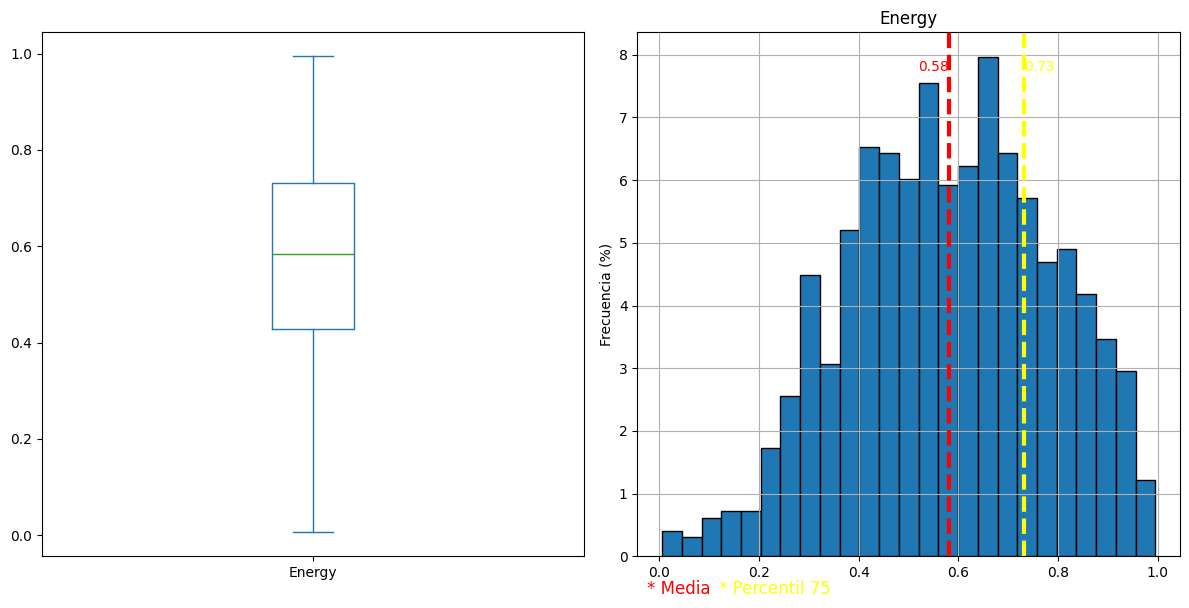

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Energy'].plot.box(ax=axes[0])

energy_hist = covers_sin_track_artist['Energy'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Energy"]) + 1. / covers_sin_track_artist["Energy"].size * 100, edgecolor='black', ax=axes[1])
energy_hist.set_title("Energy")
energy_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Energy'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Energy'], 75)
energy_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
energy_hist.text(media, valence_hist.get_ylim()[1], f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
energy_hist.text(cuartil3, valence_hist.get_ylim()[1], f'{cuartil3:.2f}', color='yellow', ha='left', va='center_baseline', rotation=0)
energy_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

plt.figtext(0.57, 0.01, "* Media", ha='center', va='center', fontsize=12, color='red')
plt.figtext(0.65, 0.01, "* Percentil 75", ha='center', va='center', fontsize=12, color='yellow')

plt.tight_layout()
plt.show()

In [27]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Energy'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Energy'].kurtosis():.2f}")

Coeficiente de asimetría: -0.14
Kurtosis: -0.58


Profundizando lo que habíamos notado al principio del trabajo con **Energy**, el boxplot y el histograma nos confirman que se trata de una distribución normal, donde con un desvío estándar cerano a cero, la gran mayoría de sus valores se concentran alrededor de la media y el coeficiente de asimetría negativo nos indica que los extremos estarán en los valores bajos de la distribución como es el caso del valor mínimo que al igual que en el caso de **Valence** no puede representarse gráficamente.

### Loudness

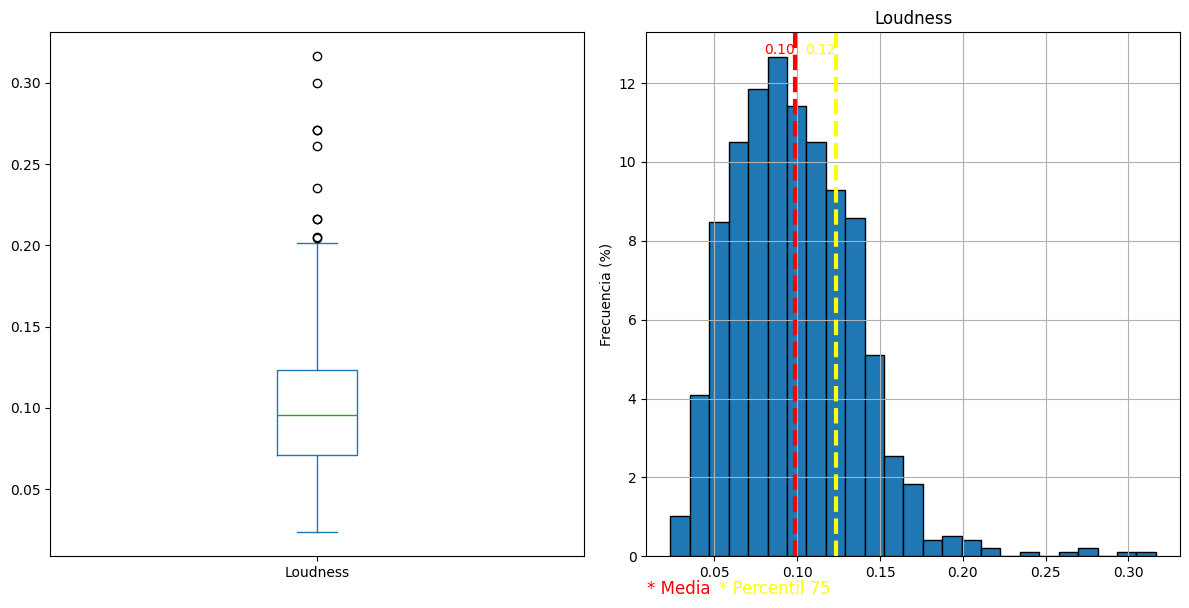

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Loudness'].plot.box(ax=axes[0])

loudness_hist = covers_sin_track_artist['Loudness'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Loudness"]) + 1. / covers_sin_track_artist["Loudness"].size * 100, edgecolor='black', ax=axes[1])
loudness_hist.set_title("Loudness")
loudness_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Loudness'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Loudness'], 75)
loudness_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
loudness_hist.text(media, loudness_hist.get_ylim()[1] * 0.97, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
loudness_hist.text(cuartil3, loudness_hist.get_ylim()[1] * 0.97, f'{cuartil3:.2f}', color='yellow', ha='right', va='center_baseline', rotation=0)
loudness_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

plt.figtext(0.57, 0.01, "* Media", ha='center', va='center', fontsize=12, color='red')
plt.figtext(0.65, 0.01, "* Percentil 75", ha='center', va='center', fontsize=12, color='yellow')

plt.tight_layout()
plt.show()

In [29]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Loudness'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Loudness'].kurtosis():.2f}")

Coeficiente de asimetría: 0.94
Kurtosis: 2.67


Observamos gráficamente que la distribución de **Loudness** tiene un sesgo a la izquierda, donde podemos ver que hay muchos valores repartidos en las zonas mas extremas por el lado de un volumen de pista bajo pero la mayoría se concentra cercano a la media con valores de pistas mas elevados. Con una kurtosis elevada sabemos que esta variable tiene una cola pesada significando la presencia de más valores atípicos respecto a su escala que una distribución normal.

### Acousticness

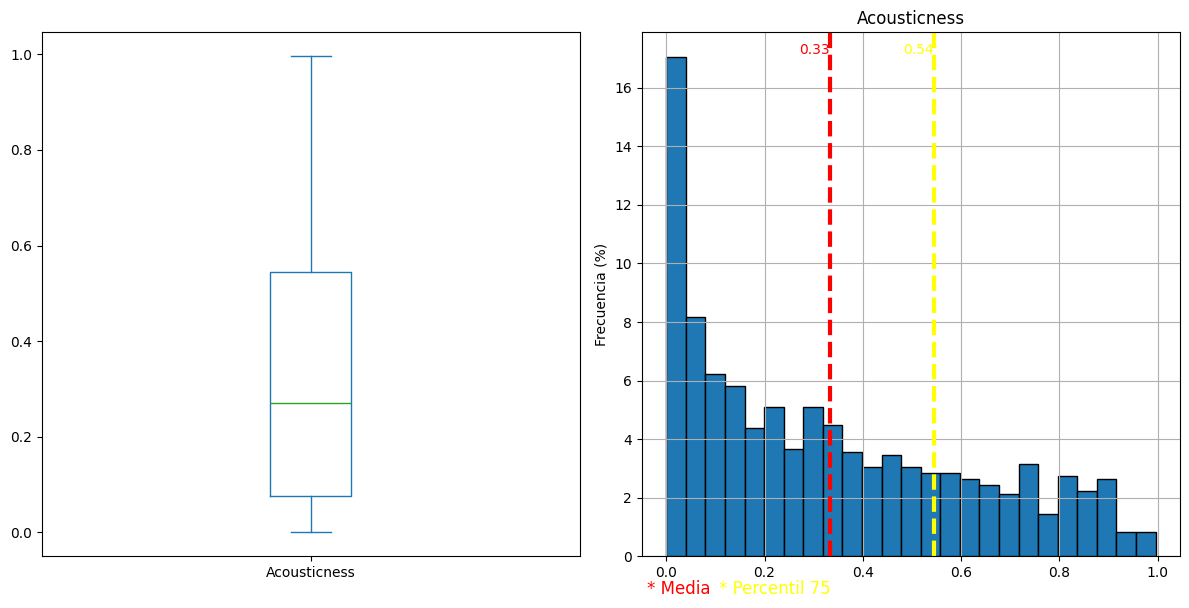

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

covers_sin_track_artist['Acousticness'].plot.box(ax=axes[0])

acousticness_hist = covers_sin_track_artist['Acousticness'].hist(bins=25, weights=np.zeros_like(covers_sin_track_artist["Acousticness"]) + 1. / covers_sin_track_artist["Acousticness"].size * 100, edgecolor='black', ax=axes[1])
acousticness_hist.set_title("Acousticness")
acousticness_hist.set_ylabel("Frecuencia (%)")

media = covers_sin_track_artist['Acousticness'].mean()
cuartil3 = np.percentile(covers_sin_track_artist['Acousticness'], 75)
acousticness_hist.axvline(media, color='red', linestyle='--', linewidth=3, label=f'Media: {media:.2f}')
acousticness_hist.text(media, acousticness_hist.get_ylim()[1] * 0.97, f'{media:.2f}', color='red', ha='right', va='center_baseline', rotation=0)
acousticness_hist.text(cuartil3, acousticness_hist.get_ylim()[1] * 0.97, f'{cuartil3:.2f}', color='yellow', ha='right', va='center_baseline', rotation=0)
acousticness_hist.axvline(cuartil3, color='yellow', linestyle='--', linewidth=3, label=f'Percentil 75: {cuartil3:.2f}')

plt.figtext(0.57, 0.01, "* Media", ha='center', va='center', fontsize=12, color='red')
plt.figtext(0.65, 0.01, "* Percentil 75", ha='center', va='center', fontsize=12, color='yellow')

plt.tight_layout()
plt.show()

In [31]:
print(f"Coeficiente de asimetría: {covers_sin_track_artist['Acousticness'].skew():.2f}")
print(f"Kurtosis: {covers_sin_track_artist['Acousticness'].kurtosis():.2f}")

Coeficiente de asimetría: 0.59
Kurtosis: -0.84


Podemos ver que la variable **Acousticness** tiene un sesgo a la derecha, con el 75% de los valores tirando hacia valores bajos y con una gran presencia de extremos mínimos en la muestra de pistas.

También notamos que tiene una frecuencia de valores mínimos en el cero y sus alrededores muy por encima del resto de muestras, por lo que vamos a estudiar un poco esto para asegurarnos de que no tengamos datos mal cargados que nos esten haciendo ruido en el análisis.

Primero, vamos a ordenar los sus valores de forma ascendente, y luego mostrar las 980 filas para poder comprobar a ojo que no tengamos un problema.

In [32]:
# Creamos una copia para no alterar ni el orden de los datos en el dataset original
copia_para_acousticness = raw_covers.copy()

# Ordenamos los valores de forma ascendente
df = copia_para_acousticness.sort_values(by='Acousticness', ascending=True)

In [33]:
# Desactivamos la opcion de Pandas que nos limita la cantidad de filas a mostrar para nuestro chequeo
pd.set_option('display.max_rows', None)

In [34]:
df['Acousticness']

888    0.000022
301    0.000109
21     0.000133
585    0.000215
143    0.000261
89     0.000274
436    0.000280
577    0.000288
7      0.000385
567    0.000598
702    0.000668
399    0.000668
36     0.000689
105    0.000779
182    0.000854
687    0.000880
839    0.000990
932    0.001030
901    0.001070
852    0.001130
975    0.001150
484    0.001190
766    0.001210
125    0.001210
866    0.001450
525    0.001460
423    0.001510
382    0.001620
499    0.001650
140    0.001900
576    0.002000
536    0.002230
580    0.002630
588    0.002900
20     0.003060
691    0.003210
643    0.003250
635    0.003400
427    0.003450
197    0.003460
689    0.004170
422    0.004290
584    0.004650
560    0.004760
571    0.004830
537    0.004840
821    0.005060
377    0.005110
917    0.005500
685    0.005740
345    0.005960
637    0.006060
246    0.006440
877    0.006550
24     0.007060
81     0.007080
650    0.007190
840    0.007190
468    0.007560
48     0.007700
882    0.007830
352    0.009460
863    0

Al imprimir todas las muestras de la variable **Acousticness** y scrollear entre ellas, podemos afirmar que no tenemos datos mal cargados en nuestro dataset porque practicamente todos los datos que nos encontramos son únicos y los repetidos no se extienden por más de 3 o 4 muestras. Asique podemos continuar con nuestro análisis sin modificar esta variable.

In [35]:
# Volvemos a establecer la configuración inicial de Pandas
pd.reset_option('display.max_rows')

### Correlación Danceability - Valence

Vamos a estudiar la relación que hay entre cuán adecuada es una pista para bailarla (Danceability) y que tan alegre es la misma (Valence).

 Para empezar siempre es conveniente hacer un gráfico de dispersión para ver particularmente los datos representados de cada variable y valorar su influencia o impacto.

Incluimos una **línea de mejor ajuste** o "line of best fit" para marcar visualmente la tendencia lineal de la correlación de las variables.

Y también generamos un diagrama de hexágonos o **Hexbin plot** para representar la densidad de los datos cuando tenemos muchos puntos agrupados o concentrados en una zona o intervalo.

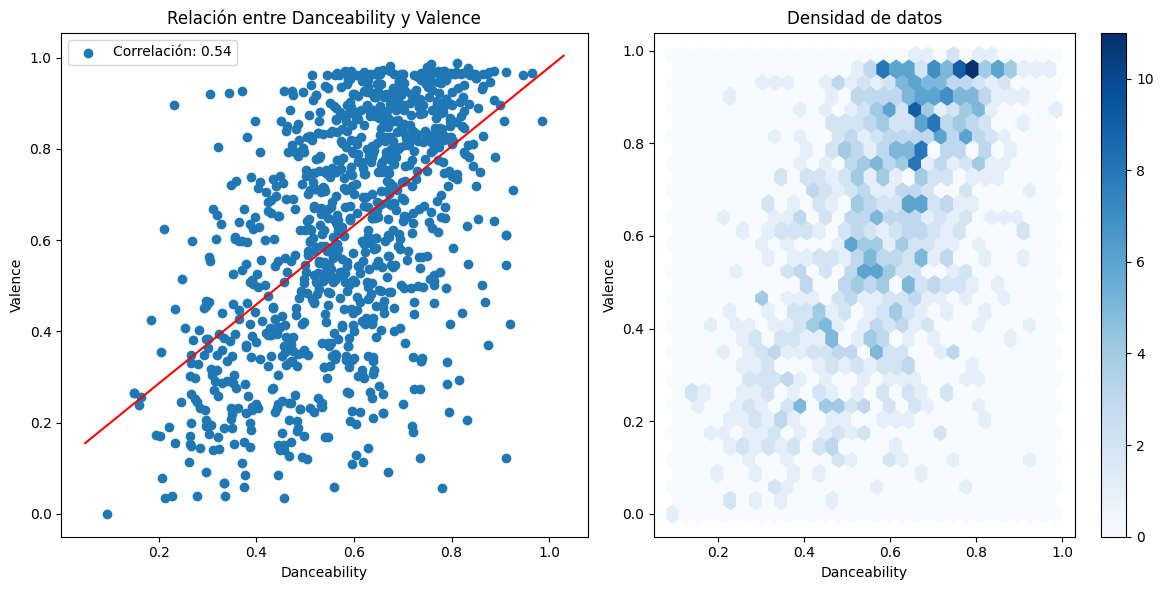

In [36]:
variable1 = 'Danceability'
variable2 = 'Valence'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


A simple vista podríamos suponer que no hay ninguna relación entre que tan "buena" es una canción para danzarla y su positividad musical fijándonos en el scatter plot por la gran dispersión que hay en los datos, donde para un mismo valor de Danceability tenemos distintos valores de Valence en casi todo su rango. Pero gracias a la herramienta de la linea de mejor ajuste y el diagrama de hexágonos podemos profundizar un poco más.

Con la **línea de mejor ajuste** marcada sabemos que la relación tiene una tendencia positiva (pendiente > 0), indicando que a medida que una pista es más adecuada para bailar (basada en el tempo, la estabilidad del ritmo, la fuerza, etc...) entonces tiene una positividad musical cada vez más alta.

Con el **Hexbin plot** conocemos que hay una concentración de valores casi máximos de **Valence** en el rango de 0.6 a 0.8 de **Danceability** lo que nos confirma un poco lo anterior: una canción adecuada para bailar tiene una tendencia a ser muy alegre o viceversa.

### Correlación Energy - Loudness

Vamos a estudiar la relación que hay entre la medida enérgica de una pista y el volúmen promedio de la misma.

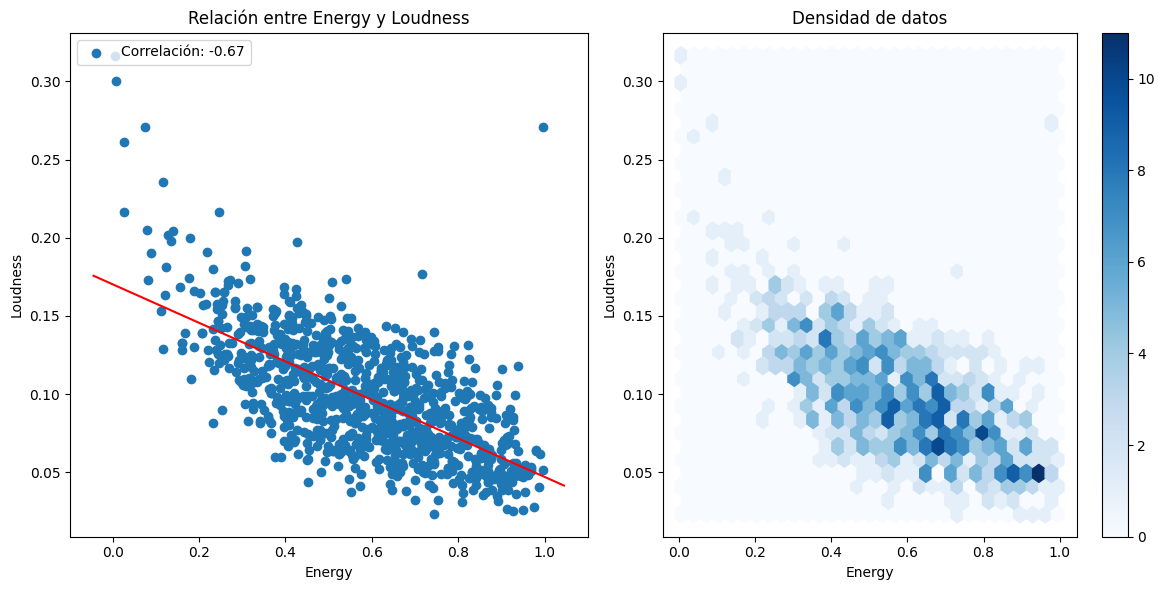

In [37]:
variable1 = 'Energy'
variable2 = 'Loudness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Como para el caso particular de la variable **Loudness** tuvimos que invertir su rango, pasando de negativo a positivo y de una escala de [-100,0] a [0,1], entonces el análisis del gráfico y de la correlación en general debe hacerse invertido, donde MENORES VALORES de Loudness representan MAYOR VOLUMEN. Por lo tanto tambien a fines practicos, la correlación de Pearson es positiva (mayores valores de uno con mayores valores de otro).

Gracias a la **línea de mejor ajuste**, si bien su pendiente es negativa, sabemos que la tendencia de los datos es positiva porque en la correlación donde a mayor volumen de la canción, más enérgica es. Y vemos en el **scatter plot** que los puntos estan concentrados sobre la línea indicando que es una correlación fuerte, lo que igualmente podíamos suponer de antemano al tener un valor de **correlación de Pearson** de 0.67 pero que ahora tenemos en frente visualmente.

Entonces, apoyádonos también en el **hexbin plot** de la derecha, estamos en condiciones de afirmar que si las canciones presentan un volumen muy elevado (cercano a 0 decibelios) entonces será mas enérgica y con mucha actividad. Esto se puede ver con la densidad de los datos donde tenemos una concentración alta que se va acentuando de manera progresiva tal como la línea de ajuste lo indicaria, en el rango de los **-15 a 0 decibelios** de volumen (valores altos teniendo en cuenta que los decibelios se miden en un rango de -100 a 0) y en el rango de **0.5 a 1 valores de Energy**.

Como ***dato extra*** notamos que tenemos un outlier en la correlación donde para el valor mas alto de Energy, tenemos un valor "relativamente bajo" en nuestra esala de volumenes cercano a -27 decibelios.

### Correlación Energy - Acousticness

Vamos a estudiar la relación que hay entre la medida enérgica de una pista y su calidad acústica o que tan acustica es.

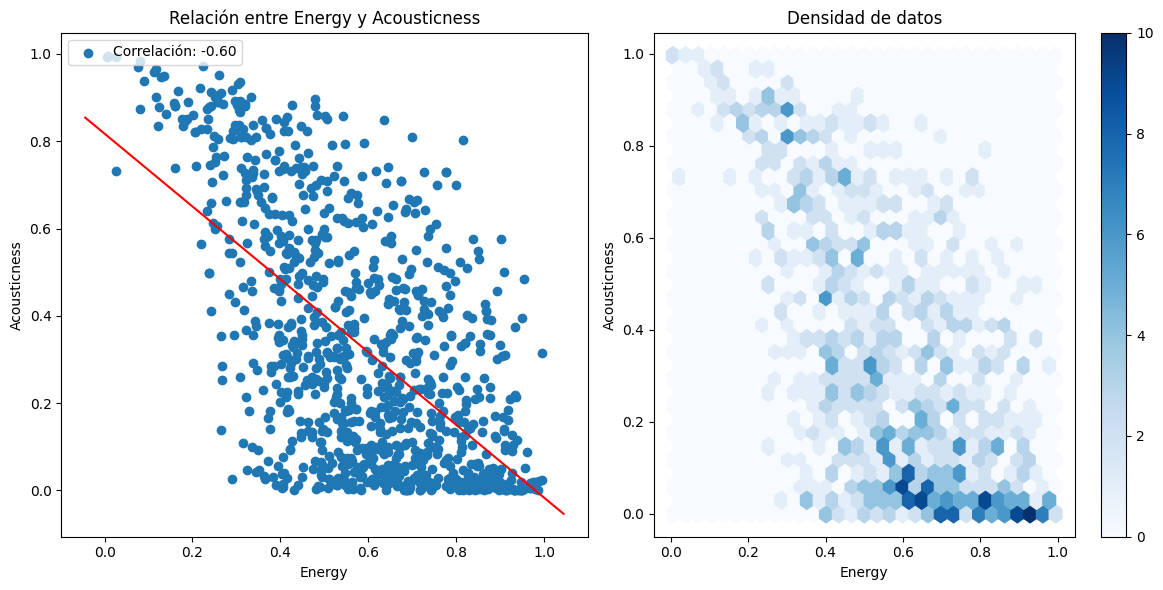

In [38]:
variable1 = 'Energy'
variable2 = 'Acousticness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Si observamos a priori la línea de mejor ajuste, podemos destacar que la tendencia de la relación es que a mayores valores de una variable, menores valores de la otra porque su pendiente es negativa.

En este caso, a mayores valores de **Energy**, menores valores de **Acousticness**, lo que traducido sería: a medida que una canción empieza a tener un tono mas enérgico, se vuelve cada vez menos acústica y eso se representa muy bien en ambos gráficos.

Si bien puede notarse en el **scatter plot** que los puntos estan bastante dispersos, ayudandonos con el **hexbin plot** podemos notar que en nuestra muestra hay una tendencia de aglomeración de datos de Acousticness en el rango de 0.6 a 1 de Energy, confirmando la conclusión anterior de la tendencia que hay pero además significando que ya prácticamente si una pista tiene un valor enérgico **mayor a 0.6** entonces se la puede considerar **nula acústicamente**

### Correlación Energy - Valence

Vamos a estudiar la relación que hay entre la medida enérgica de una canción y su positivdad musical.

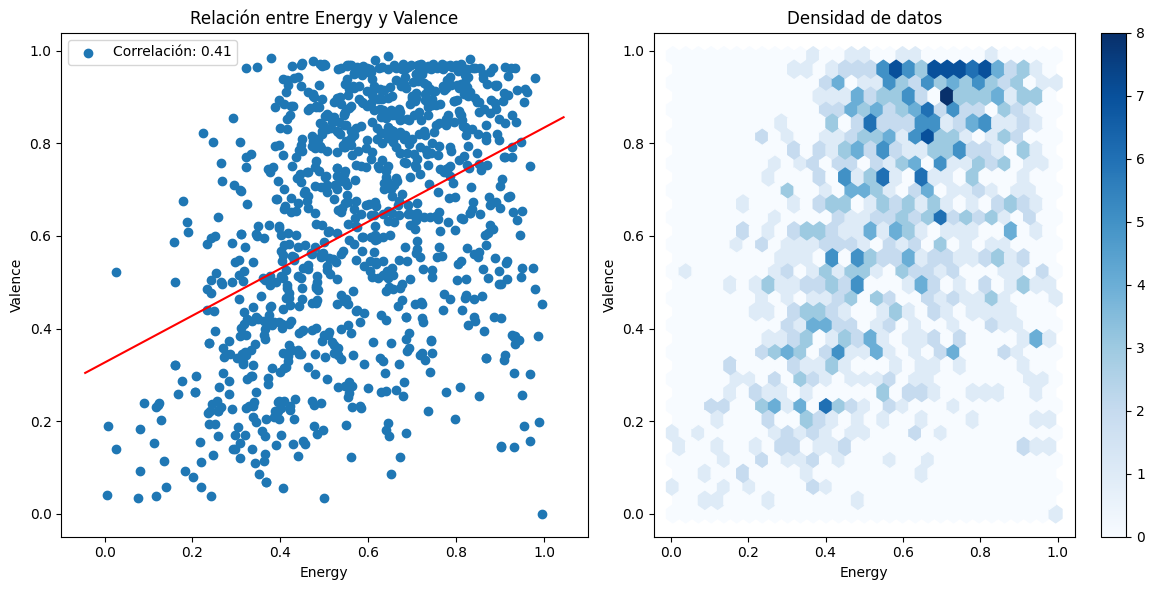

In [39]:
variable1 = 'Energy'
variable2 = 'Valence'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Nuestro valor de correlación de Pearson para esta ocasión es de 0.41, osea que se encuentra en el límite que decidimos poner para estudiar las correlaciones debido a que no tenemos ninguna que alcance el estándar aceptado de 0.7. Por lo tanto, como se considera un valor bajo se comprueba gráficamente que los datos estan bastante dispersos, teniendo para un mismo valor de Energy muchos valores de Valence y viceversa. 

Podríamos solo con ver el **scatter plot** deducir que no existe relación alguna entre la medida enérgica de una pista y que tan alegre es o que no vale la pena el análisis. Pero el **diagrama de hexagonos** nos devela que hay una concentración de datos en el rango 0.5 a 0.8 de Energy y 0.9 a 1 de Valence, lo que nos indica que *por lo menos en nuestra muestra* hay una tendencia de pistas enérgicas con valores medio-altos y casi máximos de positividad musical,

Asique, para concluir, en nuestro dataset hay una tendencia que marca que si una pista es medianamente enérgica es **muy probable** que sea una canción muy alegre. Pero no descartemos del análisis los "outliers" que nos dicen que si una canción tiene nula energía o actividad puede ser completamente triste o medianamente alegre. Y por el lado contrario, si es totalmente enérgica puede ser muy triste.

### Correlación Loudness - Acousticness

Vamos a estudiar la relación entre el volumen promedio de la cancion y su calidad acústica.

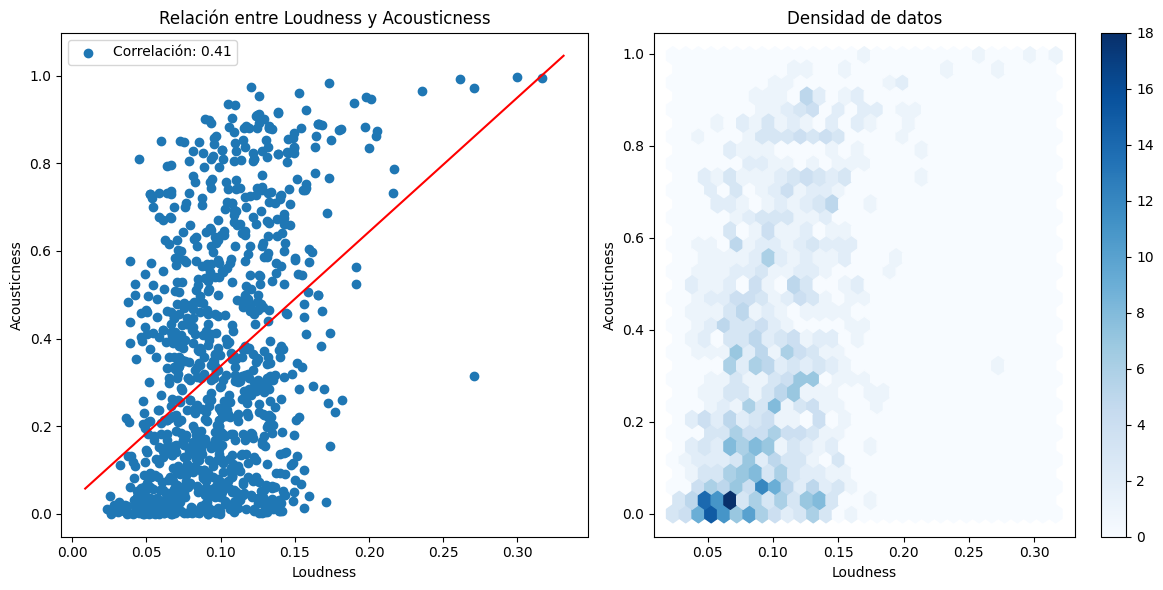

In [40]:
variable1 = 'Loudness'
variable2 = 'Acousticness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Nuevamente vale aclarar, que para el caso particular de la variable **Loudness** tuvimos que invertir su rango, pasando de negativo a positivo y de una escala de [-100,0] a [0,1], entonces el análisis del gráfico y de la correlación en general debe hacerse invertido, donde MENORES VALORES de Loudness representan MAYOR VOLUMEN. Por lo tanto tambien a fines practicos, la correlación de Pearson es negativa (menores valores de uno con mayores valores de otro).

Con la **línea de mejor ajuste** teniendo una pendiente positiva notamos que hay una tendencia entre menores valores de Loudness y menores valores de Acousticness, aunque no es algo facilmente distinguible en el gráfico de dispersión porque si agarramos el rango de -15 a 0 decibelios de volumen podemos emparejar distintos valores de medida acústica en la totalidad de su rango.

No nos sirve de mucho analizar el espacio vacio que se encuentra en los valores de -30 a -15 decibelios de volumen porque no tiene que ver con su relación de medida acústica sino con nuestra muestra en general de 980 canciones donde tenemos muy pocas que se encuentren en ese rango, con un mínimo de -31 decibelios y un promedio de -9.86. Lo mismo se puede notar en la [correlación Energy-Loudness](#correlación-energy---loudness)

Podemos destacar igualmente gracias al **hexbin plot** que las canciones con un volumen muy elevado (valores cercanos a 0 de Loudness) son casi nulas acústicamente. Pero esto solo es notable en nuestra muestra porque si nos ponemos a pensar por ejemplo el caso de las orquestas, el volumen que utilizan es muy elevado y son de las melodías mas acústicas que podemos encontrar en el mundo de la musica.

Entonces por lo explicado anteriormente, y teniendo en cuenta que la correlación de Pearson es 0.41 (rozando el limite establecido) podriamos asegurar en terminos generales que no existe una relación (por lo menos lineal) con el volumen promedio de una cancion y su nivel acústico.

## Comprobación de hipótesis

En esta parte del trabajo, vamos a evaluar [nuestras hipótesis](#planteamiento-de-hipótesis) en código de python, generando gráficos para poder deducir si estábamos en lo correcto o no.

Como las hipótesis de [Danceability-Valence](#correlación-danceability---valence) y [Energy-Loudness](#correlación-energy---loudness) ya fueron estudiadas anteriormente, vamos a analizar las restantes.

### Hipótesis Time_signature - Tempo - Energy

In [41]:
variables = ['Time_Signature', 'Tempo', 'Energy']

df_normalizado = covers_sin_track_artist.copy()
df_normalizado = (df_normalizado[variables] - df_normalizado[variables].min()) / (df_normalizado[variables].max() - df_normalizado[variables].min())


In [42]:
df_normalizado.describe()

,Time_Signature,Tempo,Energy
count,980.000000,980.000000,980.000000
mean,0.735204,0.412545,0.581558
std,0.069915,0.171813,0.204490
min,0.000000,0.000000,0.000000
25%,0.750000,0.292043,0.427088
50%,0.750000,0.403414,0.583704
75%,0.750000,0.508772,0.733500
max,1.000000,1.000000,1.000000


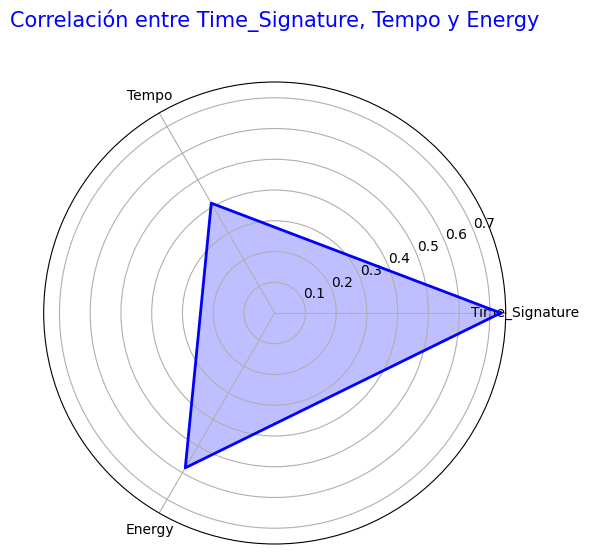

In [43]:

medias = df_normalizado.mean().values

cant_variables = len(variables)

# Crear los ángulos del gráfico radial
angles = np.linspace(0, 2 * np.pi, cant_variables, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Repetir el valor de la media para cerrar el gráfico
mean_values = np.concatenate((medias, [medias[0]]))

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar el gráfico
ax.fill(angles, mean_values, color='b', alpha=0.25)
ax.plot(angles, mean_values, color='b', linewidth=2)

# Añadir etiquetas a cada ángulo
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)

# Añadir título y ajustar los límites del gráfico
ax.set_title('Correlación entre Time_Signature, Tempo y Energy', size=15, color='blue', y=1.1)

# Mostrar el gráfico
plt.show()

nose muy bien como interpretarlo

### Hipótesis Liveness - Loudness

Probabilidad de que una pista haya sido interpretada en vivo respecto del volumen de la misma.

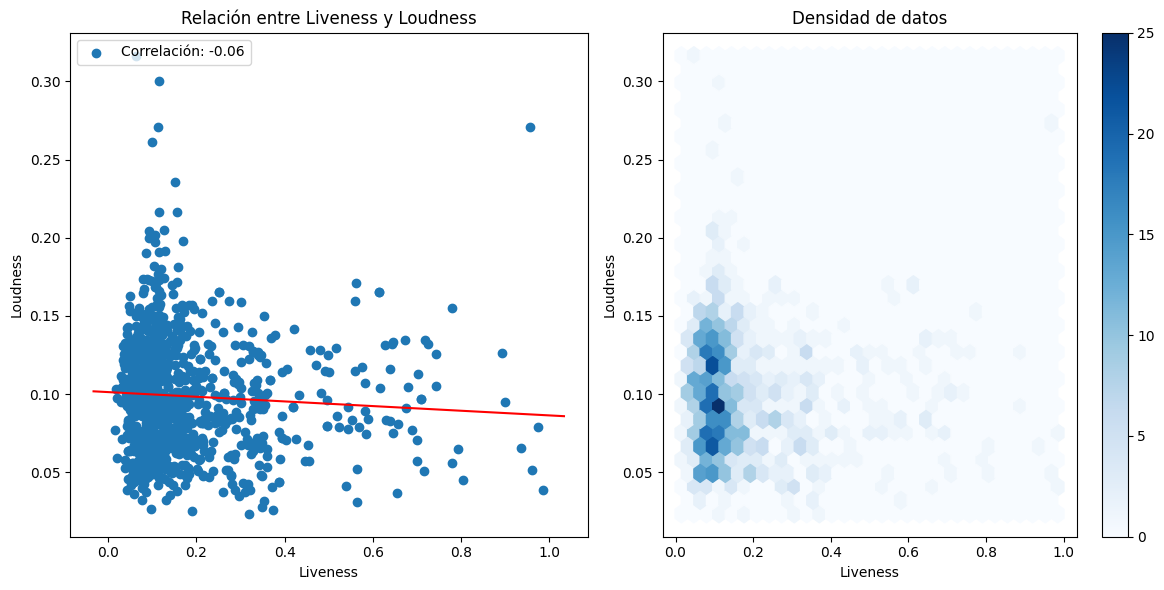

In [44]:
variable1 = 'Liveness'
variable2 = 'Loudness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Viendo el **Scatter plot** junto con el valor de la **corelación de Pearson**, la verdad que contrariamente a lo que imaginabamos, no hay relación alguna con el volumen de una canción y su posibilidad de que se haya interpretado en vivo.

En un principio, nos planteamos esta hipotesis porque creimos que los artistas o bandas iban a elegir preferentemente sus pistas mas enérgicas para interpretarlas en algun vivo. Y como vimos anteriormente en la [relación Energy-Loudness](#correlación-energy---loudness), la intensidad de una canción esta relacionada con su volumen. Pero por lo visto, nos equivocamos.

Una de las razones de las poca relación entre estas variables puede ser que en la década del 70, unos de los géneros mas populares eran el R&B y el Jazz, que no se caracterizan por un volumen alto, en la mayoria de los casos es todo lo contrario.

### Hipótesis Popularity - Liveness

Probabilidad de que una pista se haya interpretado en vivo respecto de su valor de popularidad (en nuestra muestra).

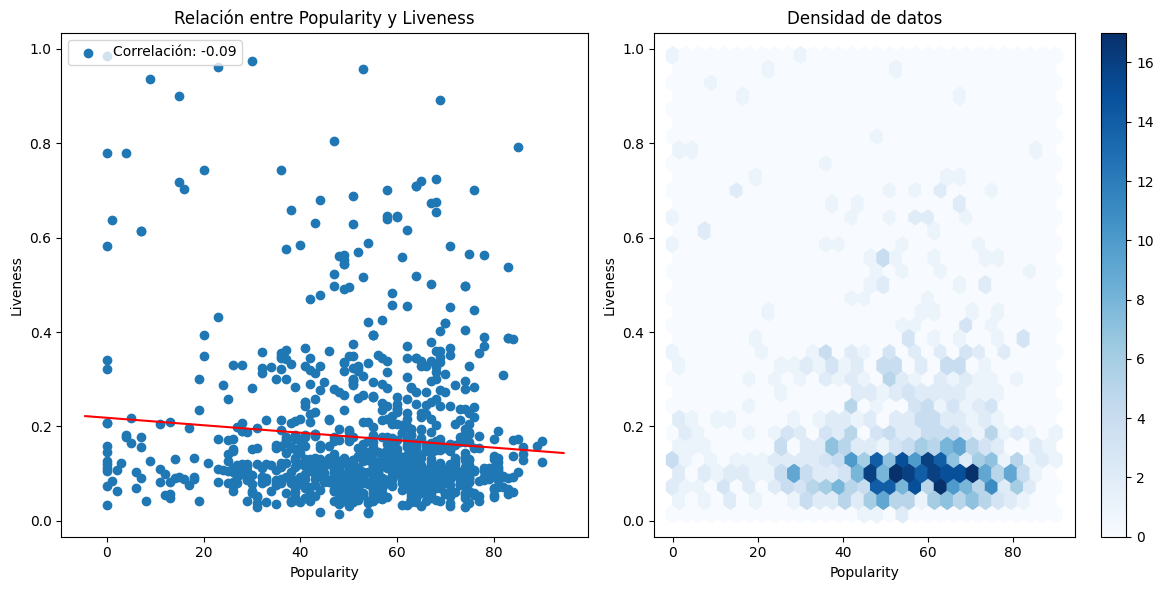

In [45]:
variable1 = 'Popularity'
variable2 = 'Liveness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Tenemos practicamente el mismo caso que la hipotesis anterior, con un valor de correlación de Pearson cercano a cero. Entonces lo que creíamos en un principio sobre si una canción tiene mucha popularidad probablemente se haya tocado en vivo, queda refutado por los datos.

Las razones por las que no se relacionan en absoluto estas dos variables pueden ser varias, comenzando por el hecho de que no tenemos contacto con el creador del Dataset y/o muestreo, lo que nos dificulta en gran medida el análisis porque no sabemos de que forma fue evaluada la popularidad de una canción. Y tampoco sabemos en que año fueron tomadas estas muestras, lo cual influye tambien en la estrategia de medida de popularidad. Sabemos que si el dataset fue creado en los años cercanos, lo mas seguro es que la popularidad se haya medido solo con las visualizaciones o vistas que tiene ese mismo tema en Youtube, pero depende el año puede haber sido tambien por la cantidad de busquedas en internet, entre tantas otras formas.

### Hipótesis Danceability - Popularity

La medida de que tan adecuada es una pista para bailar respecto de su popularidad.

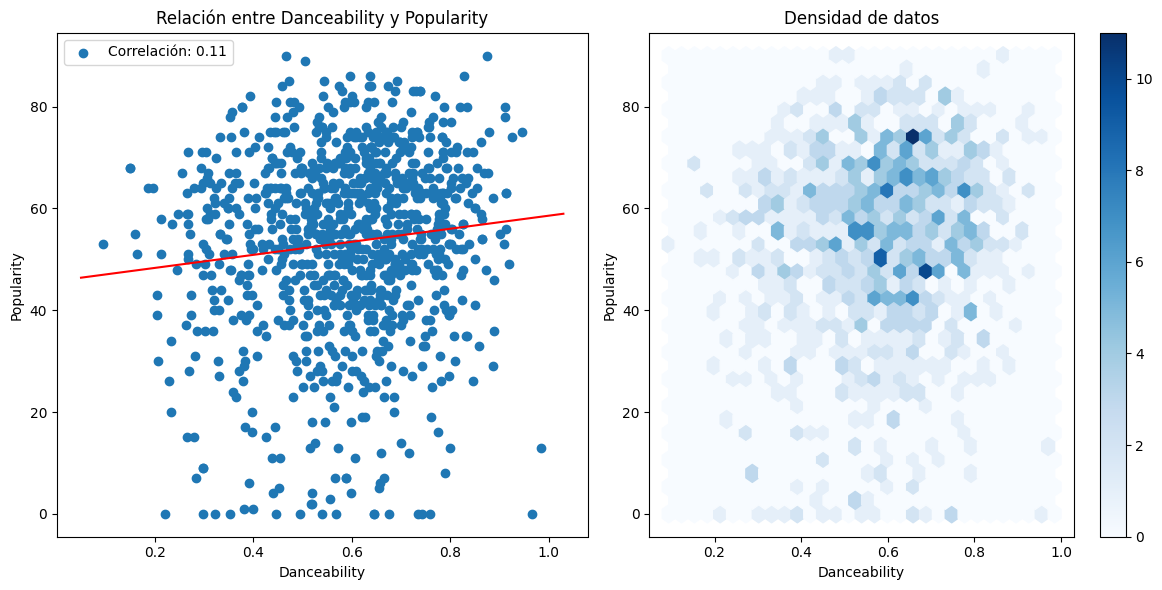

In [46]:
variable1 = 'Danceability'
variable2 = 'Popularity'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Si bien ahora el valor de **correlación de Pearson** es mucho mas grande *en escala* que las dos anteriores, sigue siendo muy bajo como para afirmar que hay algun tipo de relación entre su popularidad y su puntuación bailable, porque vemos en el Scatter plot como para muchos valores de Danceability hay muchos valores de Popularity diferentes.

Asique contrariamente a lo que intuíamos, aqui no tenemos relación alguna y puede deberse a factores relacionados con que la variable Danceability fue formada teniendo en cuenta el tempo, fuerza del ritmo y estabilidad general de la canción; todas cosas que para la década del 70 no eran una principal característica para gustar una canción o escucharla repetidamente por los géneros de moda que habia en ese momento que mencionamos anteriormente, por lo que se podría inducir que todos esos factores no impulsaban las popularidad de una canción.

### Hipótesis Instrumentalness - Speechiness

Medida de pistas con mas presencia de instrumental respecto de palabras habladas.

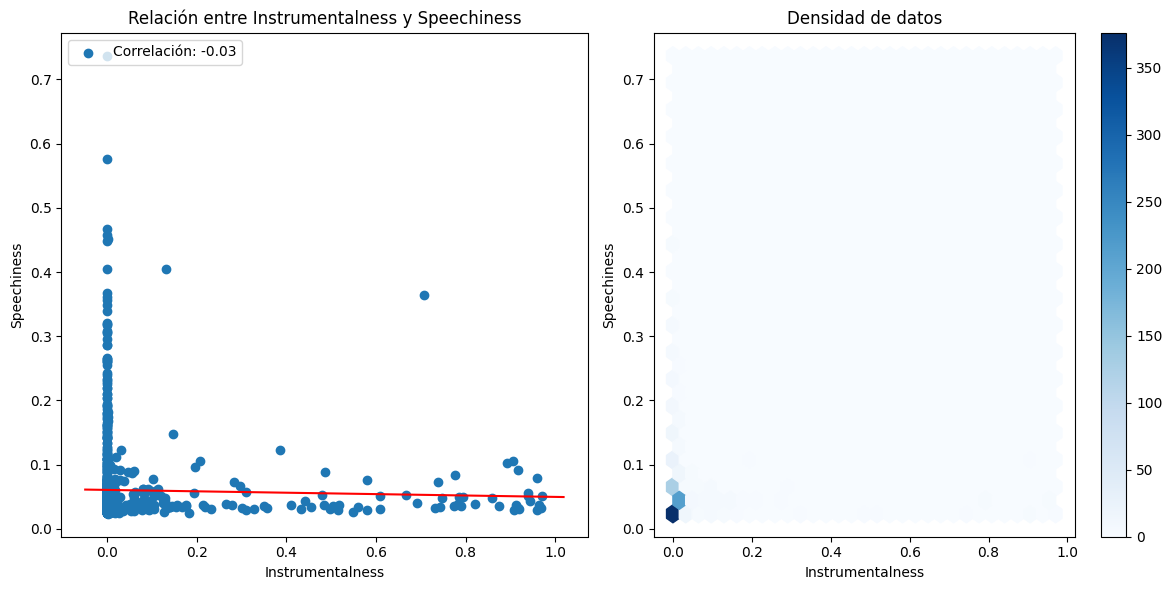

In [47]:
variable1 = 'Instrumentalness'
variable2 = 'Speechiness'

# Creacion de figura para colocar 2 gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ponemos el scatter plot del lado izquierdo
axes[0].scatter(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], label="Datos")

# Etiquetas y título del scatter plot
axes[0].set_xlabel(variable1)
axes[0].set_ylabel(variable2)
axes[0].set_title(f"Relación entre {variable1} y {variable2}")

# Calculo de la línea de mejor ajuste
slope, intercept = np.polyfit(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], 1)
x_vals = np.array(axes[0].get_xlim())  # Obtener los límites del eje x
y_vals = intercept + slope * x_vals

# Dibujamos la línea de mejor ajuste en el scatter plot
axes[0].plot(x_vals, y_vals, color='red', linestyle='-')

# Colocamos el valor de correlación en la etiqueta
correlacion = covers_sin_track_artist[variable1].corr(covers_sin_track_artist[variable2])
axes[0].legend([f"Correlación: {correlacion:.2f}"], loc="upper left")

# Generamos el diagrama de hexágonos
hb = axes[1].hexbin(covers_sin_track_artist[variable1], covers_sin_track_artist[variable2], gridsize=30, cmap='Blues')

# Agregamos guía de color al hexbin plot
plt.colorbar(hb, ax=axes[1])

# Etiquetas y título del hexbin plot
axes[1].set_title('Densidad de datos')
axes[1].set_xlabel(variable1)
axes[1].set_ylabel(variable2)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.show()


Este es por el momento el valor de correlación de Pearson mas bajo que obtuvimos, asique **nuevamente** refuta nuestra hipotesis donde creíamos que si una pista tenia una presencia mas instrumental tendría menos presencia de palabras habladas en ella.